/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


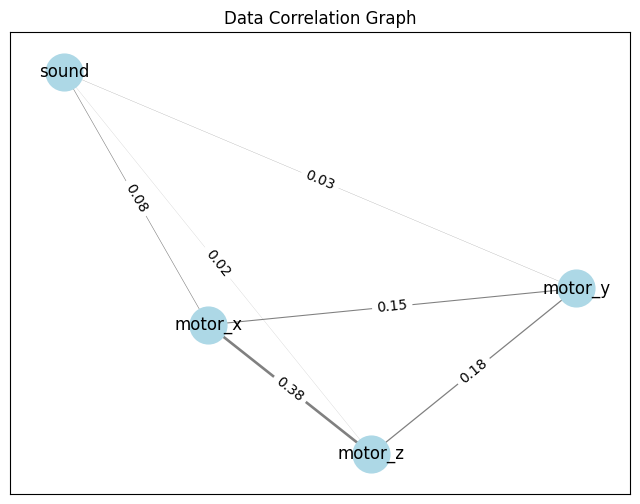

In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# 파일 경로 설정
normal_file_path = './csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_23.csv'

# CSV 파일 읽기
normal_df = pd.read_csv(normal_file_path)

# 상관 행렬 계산
corr_matrix = normal_df[['motor1_x', 'motor1_y', 'motor1_z', 'sound']].corr().values

# 상관계수 임계값 설정
threshold = 0  # 임계값을 0으로 설정하여 모든 관계 포함
edges = np.where(np.abs(corr_matrix) > threshold)

# 노드 이름 설정
node_labels = ['motor_x', 'motor_y', 'motor_z', 'sound']

# 그래프 생성
G = nx.Graph()

# 노드 추가
for node in node_labels:
    G.add_node(node)

# 엣지 추가
for i in range(len(edges[0])):
    if edges[0][i] != edges[1][i]:  # 자기 자신과의 엣지 제외
        G.add_edge(node_labels[edges[0][i]], node_labels[edges[1][i]], weight=np.abs(corr_matrix[edges[0][i], edges[1][i]]))

# 그래프 시각화
pos = nx.spring_layout(G, seed=42)  # 노드 배치 설정
plt.figure(figsize=(8, 6))

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
# 엣지 그리기 (엣지 두께는 상관계수 크기에 비례)
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=[G[u][v]['weight']*5 for u,v in G.edges()])
# 라벨 그리기
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
# 엣지 라벨 그리기 (상관계수)
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v:.2f}' for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Data Correlation Graph")
plt.show()

/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 1, Loss: 2.4352
Epoch 2, Loss: 2.6624
Epoch 3, Loss: 2.0203
Epoch 4, Loss: 1.4544
Epoch 5, Loss: 1.2379
Epoch 6, Loss: 1.2316
Epoch 7, Loss: 1.1496
Epoch 8, Loss: 1.1098
Epoch 9, Loss: 1.1089
Epoch 10, Loss: 1.0755
Epoch 11, Loss: 1.0443
Epoch 12, Loss: 1.0333
Epoch 13, Loss: 1.0285
Epoch 14, Loss: 1.0503
Epoch 15, Loss: 1.0378
Epoch 16, Loss: 1.0157
Epoch 17, Loss: 1.0128
Epoch 18, Loss: 1.0019
Epoch 19, Loss: 0.9957
Epoch 20, Loss: 0.9822
Epoch 21, Loss: 0.9667
Epoch 22, Loss: 0.9554
Epoch 23, Loss: 0.9493
Epoch 24, Loss: 0.9388
Epoch 25, Loss: 0.9368
Epoch 26, Loss: 0.9325
Epoch 27, Loss: 0.9331
Epoch 28, Loss: 0.9272
Epoch 29, Loss: 0.9198
Epoch 30, Loss: 0.9153
Epoch 31, Loss: 0.9110
Epoch 32, Loss: 0.9068
Epoch 33, Loss: 0.9082
Epoch 34, Loss: 0.9025
Epoch 35, Loss: 0.9010
Epoch 36, Loss: 0.8973
Epoch 37, Loss: 0.8944
Epoch 38, Loss: 0.8902
Epoch 39, Loss: 0.8876
Epoch 40, Loss: 0.8871
Epoch 41, Loss: 0.8848
Epoch 42, Loss: 0.8840
Epoch 43, Loss: 0.8800
Epoch 44, Loss: 0.87

/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Train Loss: 0.6168, Validation Loss: 0.5778
Epoch 2/100, Train Loss: 0.5632, Validation Loss: 0.5650
Epoch 3/100, Train Loss: 0.5372, Validation Loss: 0.5162
Epoch 4/100, Train Loss: 0.5222, Validation Loss: 0.5677
Epoch 5/100, Train Loss: 0.5017, Validation Loss: 0.5393
Epoch 6/100, Train Loss: 0.5006, Validation Loss: 0.5037
Epoch 7/100, Train Loss: 0.4907, Validation Loss: 0.5020
Epoch 8/100, Train Loss: 0.4839, Validation Loss: 0.5133
Epoch 9/100, Train Loss: 0.4788, Validation Loss: 0.5090
Epoch 10/100, Train Loss: 0.4752, Validation Loss: 0.4951
Epoch 11/100, Train Loss: 0.4691, Validation Loss: 0.4758
Epoch 12/100, Train Loss: 0.4661, Validation Loss: 0.4849
Epoch 13/100, Train Loss: 0.4626, Validation Loss: 0.5321
Epoch 14/100, Train Loss: 0.4625, Validation Loss: 0.4969
Epoch 15/100, Train Loss: 0.4606, Validation Loss: 0.4789
Epoch 16/100, Train Loss: 0.4572, Validation Loss: 0.4885
Epoch 17/100, Train Loss: 0.4565, Validation Loss: 0.4877
Epoch 18/100, Train Los

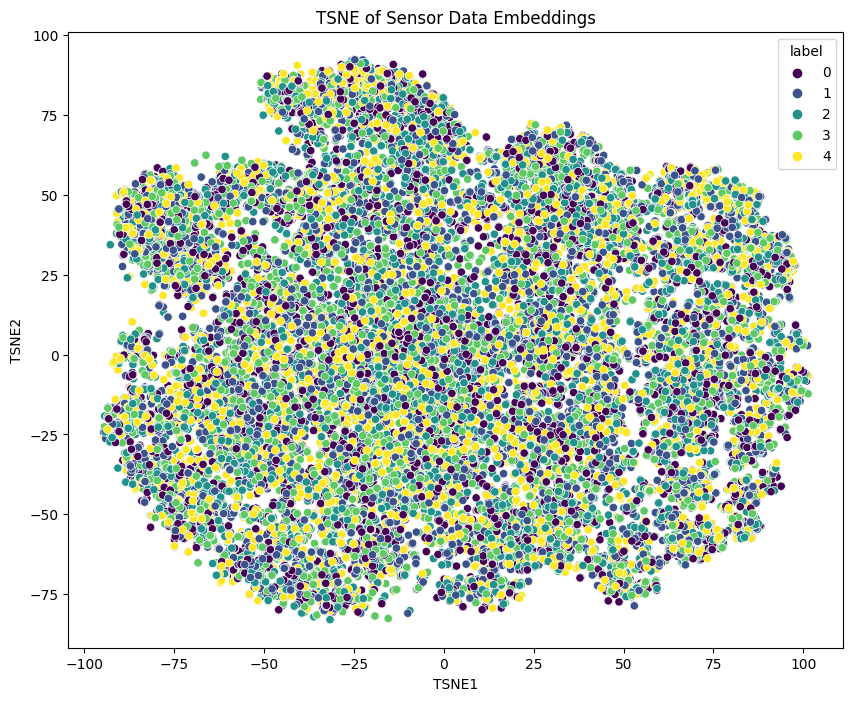

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv, VGAE
from torch_geometric.data import Data
from torch_geometric.utils import train_test_split_edges
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.signal import stft
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# 데이터 파일 로드 및 정규화
def normalize_data(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

def load_and_normalize_data(filenames, label):
    data_list = []
    for filename in filenames:
        df = pd.read_csv(filename)
        motor_data_normalized = normalize_data(df[['motor1_x', 'motor1_y', 'motor1_z']])
        sound_data_normalized = normalize_data(df[['sound']])
        data_list.append((motor_data_normalized, sound_data_normalized, label))
    return data_list

normal_files = ["./csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_22.csv"]
fault1_files = ["./csv/5000hz/300rpm/300rpm carriage damage/stream2024_4_23_2_56.csv"]
fault2_files = ["./csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_20.csv"]
fault3_files = ["./csv/5000hz/300rpm/300rpm lack of lubrication/stream2024_4_23_2_6.csv"]
fault4_files = ["./csv/5000hz/300rpm/300rpm oxidation and corrosion/stream2024_4_23_1_15.csv"]

data_normal = load_and_normalize_data(normal_files, 0)
data_fault1 = load_and_normalize_data(fault1_files, 1)
data_fault2 = load_and_normalize_data(fault2_files, 2)
data_fault3 = load_and_normalize_data(fault3_files, 3)
data_fault4 = load_and_normalize_data(fault4_files, 4)

all_data = data_normal + data_fault1 + data_fault2 + data_fault3 + data_fault4

# 시계열 데이터를 윈도우로 분할
def create_windows(data, window_size, stride):
    windows = []
    labels = []
    for (motor_data, sound_data, label) in data:
        combined_data = np.hstack([motor_data, sound_data])
        for i in range(0, len(combined_data) - window_size + 1, stride):
            window = combined_data[i:i + window_size, :]
            windows.append(window)
            labels.append(label)
    return np.array(windows), np.array(labels)

window_size = 100
stride = 50
features, labels = create_windows(all_data, window_size, stride)

# STFT 변환 함수
def apply_stft(windows, nperseg=50):
    stft_windows = []
    for window in windows:
        stft_result = []
        for signal in window.T:
            f, t, Zxx = stft(signal, nperseg=min(len(signal), nperseg))
            stft_result.append(np.abs(Zxx))
        stft_windows.append(np.array(stft_result))
    return np.array(stft_windows)

# STFT 변환 적용
stft_features = apply_stft(features)

# STFT 결과를 (samples, time, features) 형태로 변환
stft_features = stft_features.transpose(0, 2, 1, 3)  # (samples, time, features)

# 노드 특성 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(stft_features.reshape(stft_features.shape[0], -1))

# KNN을 사용하여 엣지 생성
k = 5
knn = NearestNeighbors(n_neighbors=k).fit(features_scaled)
distances, indices = knn.kneighbors(features_scaled)

edge_index = []
for i in range(indices.shape[0]):
    for j in range(1, k):
        edge_index.append([i, indices[i, j]])

edge_index = np.array(edge_index).T

# 그래프 데이터 객체 생성
x = torch.tensor(features_scaled, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long)
data = Data(x=x, edge_index=edge_index)

# 그래프 데이터 분할
data = train_test_split_edges(data)

# GraphVAE 모델 정의
class GraphVAE(VGAE):
    def __init__(self, in_channels, out_channels):
        encoder = torch.nn.ModuleList([
            GCNConv(in_channels, 16),
            GCNConv(16, out_channels)
        ])
        super(GraphVAE, self).__init__(encoder)
        self.conv1 = encoder[0]
        self.conv2 = encoder[1]
        self.__mu__ = None
        self.__logstd__ = None

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        self.__mu__ = self.conv2(x, edge_index)
        self.__logstd__ = torch.zeros_like(self.__mu__)
        return self.__mu__

# 모델 학습
in_channels = x.shape[1]
out_channels = 16  # 잠재 공간의 차원 수를 늘립니다.
model = GraphVAE(in_channels, out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    z = model.encode(data.x, data.train_pos_edge_index)
    loss = model.recon_loss(z, data.train_pos_edge_index)
    loss = loss + (1 / data.num_nodes) * model.kl_loss()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# 학습된 모델을 사용하여 노드 임베딩 추출
model.eval()
with torch.no_grad():
    z = model.encode(data.x, data.test_pos_edge_index)

# 임베딩과 레이블 준비
X = z.cpu().numpy()
y = labels

# 데이터 분할 (Train: 80%, Validation: 10%, Test: 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Transformer 모델 정의
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_encoder_layers=3, dim_feedforward=128, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout),
            num_layers=num_encoder_layers
        )
        self.fc = nn.Linear(d_model, num_classes)
        self.input_dim = input_dim
        self.d_model = d_model
        self.linear = nn.Linear(input_dim, d_model)

    def forward(self, x):
        # x: (batch_size, seq_len, input_dim)
        x = self.linear(x)  # (batch_size, seq_len, d_model)
        x = x.permute(1, 0, 2)  # (seq_len, batch_size, d_model)
        x = self.encoder(x)  # (seq_len, batch_size, d_model)
        x = x.mean(dim=0)  # (batch_size, d_model)
        x = self.fc(x)  # (batch_size, num_classes)
        return x

# 하이퍼파라미터 설정
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))

model = TimeSeriesTransformer(input_dim=input_dim, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

# 데이터셋 및 데이터로더 생성
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    
    # 학습
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), -1, input_dim)  # 입력 차원 조정
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    # 검증
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.view(inputs.size(0), -1, input_dim)  # 입력 차원 조정
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 모델 평가
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.size(0), -1, input_dim)  # 입력 차원 조정
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# 성능 평가
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

# F1 스코어 계산
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score (weighted): {f1:.4f}')

# TSNE를 사용하여 임베딩 축소 및 시각화
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(X)  # z 대신 X를 사용하여 전체 데이터의 임베딩을 사용

# train_test_split에서 분할된 라벨 사용
df_embeddings = pd.DataFrame(embeddings_2d, columns=['TSNE1', 'TSNE2'])
df_embeddings['label'] = np.concatenate([y_train, y_val, y_test])  # 분할된 y_train, y_val, y_test를 결합하여 사용

# TSNE 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_embeddings, x='TSNE1', y='TSNE2', hue='label', palette='viridis', legend='full')
plt.title("TSNE of Sensor Data Embeddings")
plt.show()


/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 1, Loss: 2.5519
Epoch 2, Loss: 4.1542
Epoch 3, Loss: 2.4995
Epoch 4, Loss: 1.4815
Epoch 5, Loss: 1.1552
Epoch 6, Loss: 1.2180
Epoch 7, Loss: 1.2550
Epoch 8, Loss: 1.1012
Epoch 9, Loss: 1.0332
Epoch 10, Loss: 1.0516
Epoch 11, Loss: 1.0637
Epoch 12, Loss: 1.0656
Epoch 13, Loss: 1.0575
Epoch 14, Loss: 1.0427
Epoch 15, Loss: 1.0196
Epoch 16, Loss: 0.9967
Epoch 17, Loss: 0.9968
Epoch 18, Loss: 1.0095
Epoch 19, Loss: 1.0066
Epoch 20, Loss: 0.9827
Epoch 21, Loss: 0.9604
Epoch 22, Loss: 0.9485
Epoch 23, Loss: 0.9462
Epoch 24, Loss: 0.9390
Epoch 25, Loss: 0.9361
Epoch 26, Loss: 0.9301
Epoch 27, Loss: 0.9284
Epoch 28, Loss: 0.9183
Epoch 29, Loss: 0.9142
Epoch 30, Loss: 0.9125
Epoch 31, Loss: 0.9083
Epoch 32, Loss: 0.9048
Epoch 33, Loss: 0.9050
Epoch 34, Loss: 0.8944
Epoch 35, Loss: 0.8912
Epoch 36, Loss: 0.8918
Epoch 37, Loss: 0.8926
Epoch 38, Loss: 0.8905
Epoch 39, Loss: 0.8841
Epoch 40, Loss: 0.8852
Epoch 41, Loss: 0.8805
Epoch 42, Loss: 0.8781
Epoch 43, Loss: 0.8743
Epoch 44, Loss: 0.87

/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Train Loss: 0.4603, Validation Loss: 0.4430
Epoch 2/100, Train Loss: 0.4148, Validation Loss: 0.3978
Epoch 3/100, Train Loss: 0.3989, Validation Loss: 0.3939
Epoch 4/100, Train Loss: 0.3921, Validation Loss: 0.4081
Epoch 5/100, Train Loss: 0.3858, Validation Loss: 0.3890
Epoch 6/100, Train Loss: 0.3806, Validation Loss: 0.3873
Epoch 7/100, Train Loss: 0.3743, Validation Loss: 0.3782
Epoch 8/100, Train Loss: 0.3694, Validation Loss: 0.3810
Epoch 9/100, Train Loss: 0.3625, Validation Loss: 0.3702
Epoch 10/100, Train Loss: 0.3597, Validation Loss: 0.3672
Epoch 11/100, Train Loss: 0.3541, Validation Loss: 0.3677
Epoch 12/100, Train Loss: 0.3527, Validation Loss: 0.3648
Epoch 13/100, Train Loss: 0.3501, Validation Loss: 0.3710
Epoch 14/100, Train Loss: 0.3473, Validation Loss: 0.3665
Epoch 15/100, Train Loss: 0.3431, Validation Loss: 0.3692
Epoch 16/100, Train Loss: 0.3436, Validation Loss: 0.3596
Epoch 17/100, Train Loss: 0.3394, Validation Loss: 0.3780
Epoch 18/100, Train Los

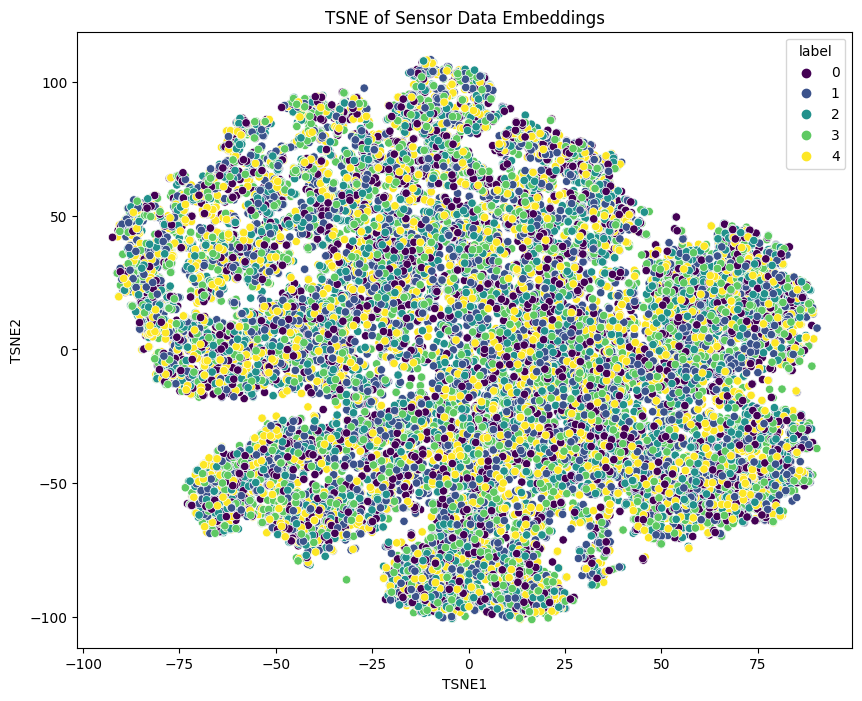

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv, VGAE
from torch_geometric.data import Data
from torch_geometric.utils import train_test_split_edges
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.signal import stft
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# 데이터 파일 로드 및 정규화
def normalize_data(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

def load_and_normalize_data(filenames, label):
    data_list = []
    for filename in filenames:
        df = pd.read_csv(filename)
        motor_data_normalized = normalize_data(df[['motor1_x', 'motor1_y', 'motor1_z']])
        sound_data_normalized = normalize_data(df[['sound']])
        data_list.append((motor_data_normalized, sound_data_normalized, label))
    return data_list

normal_files = ["./csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_22.csv"]
fault1_files = ["./csv/5000hz/300rpm/300rpm carriage damage/stream2024_4_23_2_56.csv"]
fault2_files = ["./csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_20.csv"]
fault3_files = ["./csv/5000hz/300rpm/300rpm lack of lubrication/stream2024_4_23_2_6.csv"]
fault4_files = ["./csv/5000hz/300rpm/300rpm oxidation and corrosion/stream2024_4_23_1_15.csv"]

data_normal = load_and_normalize_data(normal_files, 0)
data_fault1 = load_and_normalize_data(fault1_files, 1)
data_fault2 = load_and_normalize_data(fault2_files, 2)
data_fault3 = load_and_normalize_data(fault3_files, 3)
data_fault4 = load_and_normalize_data(fault4_files, 4)

all_data = data_normal + data_fault1 + data_fault2 + data_fault3 + data_fault4

# 시계열 데이터를 윈도우로 분할
def create_windows(data, window_size, stride):
    windows = []
    labels = []
    for (motor_data, sound_data, label) in data:
        combined_data = np.hstack([motor_data, sound_data])
        for i in range(0, len(combined_data) - window_size + 1, stride):
            window = combined_data[i:i + window_size, :]
            windows.append(window)
            labels.append(label)
    return np.array(windows), np.array(labels)

window_size = 100
stride = 50
features, labels = create_windows(all_data, window_size, stride)

# STFT 변환 함수
def apply_stft(windows, nperseg=50):
    stft_windows = []
    for window in windows:
        stft_result = []
        for signal in window.T:
            f, t, Zxx = stft(signal, nperseg=min(len(signal), nperseg))
            stft_result.append(np.abs(Zxx))
        stft_windows.append(np.array(stft_result))
    return np.array(stft_windows)

# STFT 변환 적용
stft_features = apply_stft(features)

# STFT 결과를 (samples, time, features) 형태로 변환
stft_features = stft_features.transpose(0, 2, 1, 3)  # (samples, time, features)

# 노드 특성 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(stft_features.reshape(stft_features.shape[0], -1))

# KNN을 사용하여 엣지 생성
k = 5
knn = NearestNeighbors(n_neighbors=k).fit(features_scaled)
distances, indices = knn.kneighbors(features_scaled)

edge_index = []
for i in range(indices.shape[0]):
    for j in range(1, k):
        edge_index.append([i, indices[i, j]])

edge_index = np.array(edge_index).T

# 그래프 데이터 객체 생성
x = torch.tensor(features_scaled, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long)
data = Data(x=x, edge_index=edge_index)

# 그래프 데이터 분할
data = train_test_split_edges(data)

# GraphVAE 모델 정의
class GraphVAE(VGAE):
    def __init__(self, in_channels, out_channels):
        encoder = torch.nn.ModuleList([
            GCNConv(in_channels, 16),
            GCNConv(16, out_channels)
        ])
        super(GraphVAE, self).__init__(encoder)
        self.conv1 = encoder[0]
        self.conv2 = encoder[1]
        self.__mu__ = None
        self.__logstd__ = None

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        self.__mu__ = self.conv2(x, edge_index)
        self.__logstd__ = torch.zeros_like(self.__mu__)
        return self.__mu__

# 모델 학습
in_channels = x.shape[1]
out_channels = 16  # 잠재 공간의 차원 수를 늘립니다.
model = GraphVAE(in_channels, out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    z = model.encode(data.x, data.train_pos_edge_index)
    loss = model.recon_loss(z, data.train_pos_edge_index)
    loss = loss + (1 / data.num_nodes) * model.kl_loss()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# 학습된 모델을 사용하여 노드 임베딩 추출
model.eval()
with torch.no_grad():
    z = model.encode(data.x, data.test_pos_edge_index)

# 임베딩과 레이블 준비
X = z.cpu().numpy()
y = labels

# 데이터 분할 (Train: 80%, Validation: 10%, Test: 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Transformer 모델 정의
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_encoder_layers=3, dim_feedforward=128, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout),
            num_layers=num_encoder_layers
        )
        self.fc = nn.Linear(d_model, num_classes)
        self.input_dim = input_dim
        self.d_model = d_model
        self.linear = nn.Linear(input_dim, d_model)

    def forward(self, x):
        # x: (batch_size, seq_len, input_dim)
        x = self.linear(x)  # (batch_size, seq_len, d_model)
        x = x.permute(1, 0, 2)  # (seq_len, batch_size, d_model)
        x = self.encoder(x)  # (seq_len, batch_size, d_model)
        x = x.mean(dim=0)  # (batch_size, d_model)
        x = self.fc(x)  # (batch_size, num_classes)
        return x

# 하이퍼파라미터 설정
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))

model = TimeSeriesTransformer(input_dim=input_dim, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 데이터셋 및 데이터로더 생성
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    val_loss = 0.0
    
    # 학습
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), -1, input_dim)  # 입력 차원 조정
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    # 검증
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.view(inputs.size(0), -1, input_dim)  # 입력 차원 조정
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# 모델 평가
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.size(0), -1, input_dim)  # 입력 차원 조정
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# 성능 평가
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

# F1 스코어 계산
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1 Score (weighted): {f1:.4f}')

# TSNE를 사용하여 임베딩 축소 및 시각화
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(X)  # z 대신 X를 사용하여 전체 데이터의 임베딩을 사용

# train_test_split에서 분할된 라벨 사용
df_embeddings = pd.DataFrame(embeddings_2d, columns=['TSNE1', 'TSNE2'])
df_embeddings['label'] = np.concatenate([y_train, y_val, y_test])  # 분할된 y_train, y_val, y_test를 결합하여 사용

# TSNE 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_embeddings, x='TSNE1', y='TSNE2', hue='label', palette='viridis', legend='full')
plt.title("TSNE of Sensor Data Embeddings")
plt.show()
